<a href="https://colab.research.google.com/github/coabulatao/CCS8-Github-Repository/blob/main/Model_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


🔹 Random Forest Performance:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000


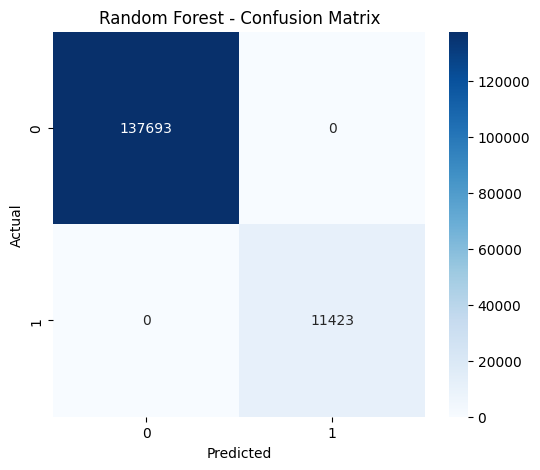


🔹 SVM Performance:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000


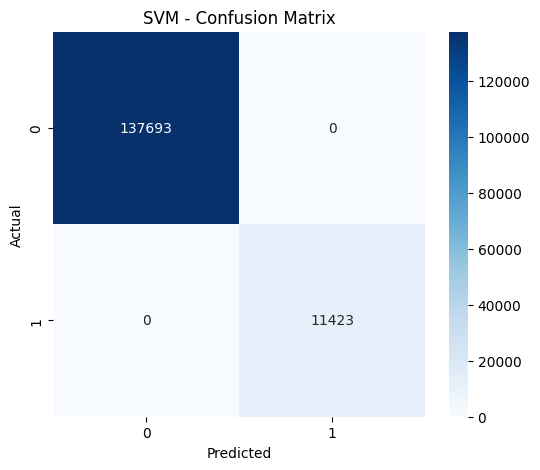

In [ ]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 STEP 1: Load the dataset
file_path = "Coffee_Dataset_Final.xlsx"  # Change this to your dataset's filename
df = pd.read_excel(file_path)

# 🔹 STEP 2: Preprocess dataset (adjust based on your previous preprocessing)
# Assuming 'is_peak' is the target variable
X = df.drop(columns=['is_peak'])
y = df['is_peak']

# Optional: Perform one-hot encoding or scaling if you did so earlier
# Example: X = pd.get_dummies(X, drop_first=True)

# 🔹 STEP 3: Load trained models
random_forest_model = joblib.load("Random_Forest_Classifier.pkl")  # Change filename if needed
svm_model = joblib.load("SVM_Hyperparameter_Tuned.pkl")  # Change filename if needed

# 🔹 STEP 4: Make predictions
y_pred_rf = random_forest_model.predict(X)
y_pred_svm = svm_model.predict(X)

# 🔹 STEP 5: Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n🔹 {model_name} Performance:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# 🔹 Compare both models
evaluate_model(y, y_pred_rf, "Random Forest")
evaluate_model(y, y_pred_svm, "SVM")


In [ ]:
import matplotlib.pyplot as plt

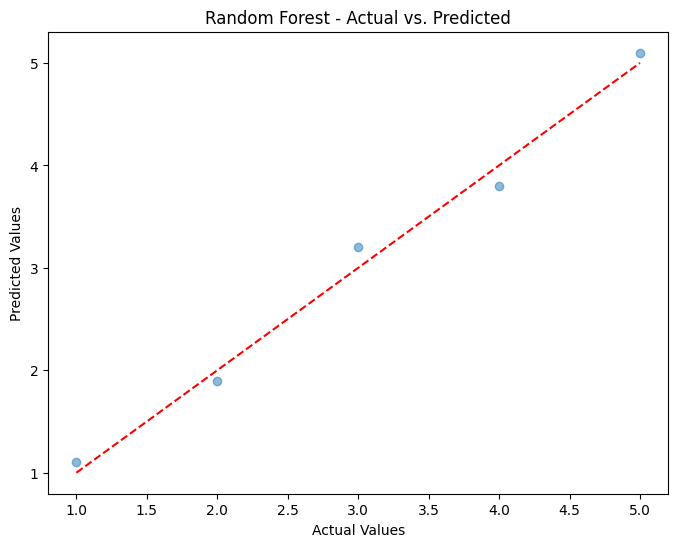

In [ ]:


# Ensure y and y_pred_rf are defined and have matching dimensions
# Replace these with your actual data
y = [1, 2, 3, 4, 5]  # Example actual values
y_pred_rf = [1.1, 1.9, 3.2, 3.8, 5.1]  # Example predicted values

# Check if the lengths of y and y_pred_rf match
if len(y) != len(y_pred_rf):
    raise ValueError("Length of 'y' and 'y_pred_rf' must be equal")

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.scatter(y, y_pred_rf, alpha=0.5)  # Plot scatter of actual vs predicted values
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest - Actual vs. Predicted")
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')  # Add a diagonal line for reference
plt.show()

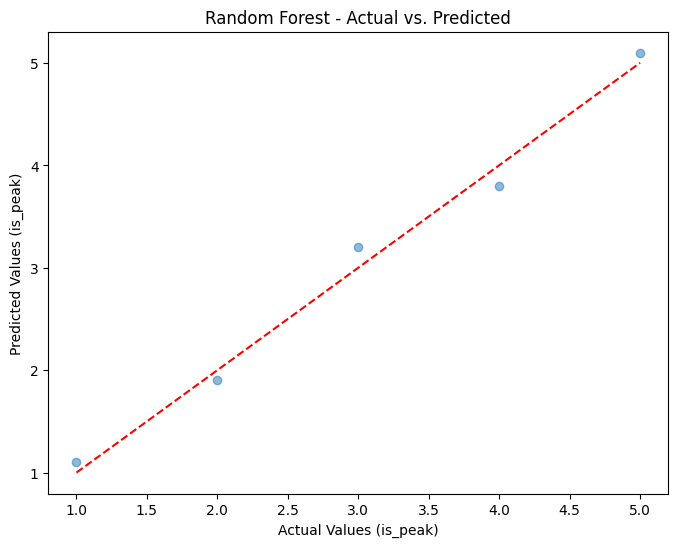

In [ ]:
import matplotlib.pyplot as plt

# Check if the lengths of y and y_pred_rf match
if len(y) != len(y_pred_rf):
    raise ValueError("Length of 'y' and 'y_pred_rf' must be equal")

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.scatter(y, y_pred_rf, alpha=0.5)  # Plot scatter of actual vs predicted values
plt.xlabel("Actual Values (is_peak)")
plt.ylabel("Predicted Values (is_peak)")
plt.title("Random Forest - Actual vs. Predicted")
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')  # Add a diagonal line for reference
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Choose the number of folds (5 or 10 is common)
cv_folds = 5

# Perform cross-validation for Random Forest
rf_cv_scores = cross_val_score(random_forest_model, X, y, cv=cv_folds, scoring='accuracy')

# Perform cross-validation for SVM
svm_cv_scores = cross_val_score(svm_model, X, y, cv=cv_folds, scoring='accuracy')

# Print the average accuracy and standard deviation
print(f"Random Forest CV Accuracy: {rf_cv_scores.mean():.4f} ± {rf_cv_scores.std():.4f}")
print(f"SVM CV Accuracy: {svm_cv_scores.mean():.4f} ± {svm_cv_scores.std():.4f}")


Random Forest CV Accuracy: 1.0000 ± 0.0000
SVM CV Accuracy: 1.0000 ± 0.0000


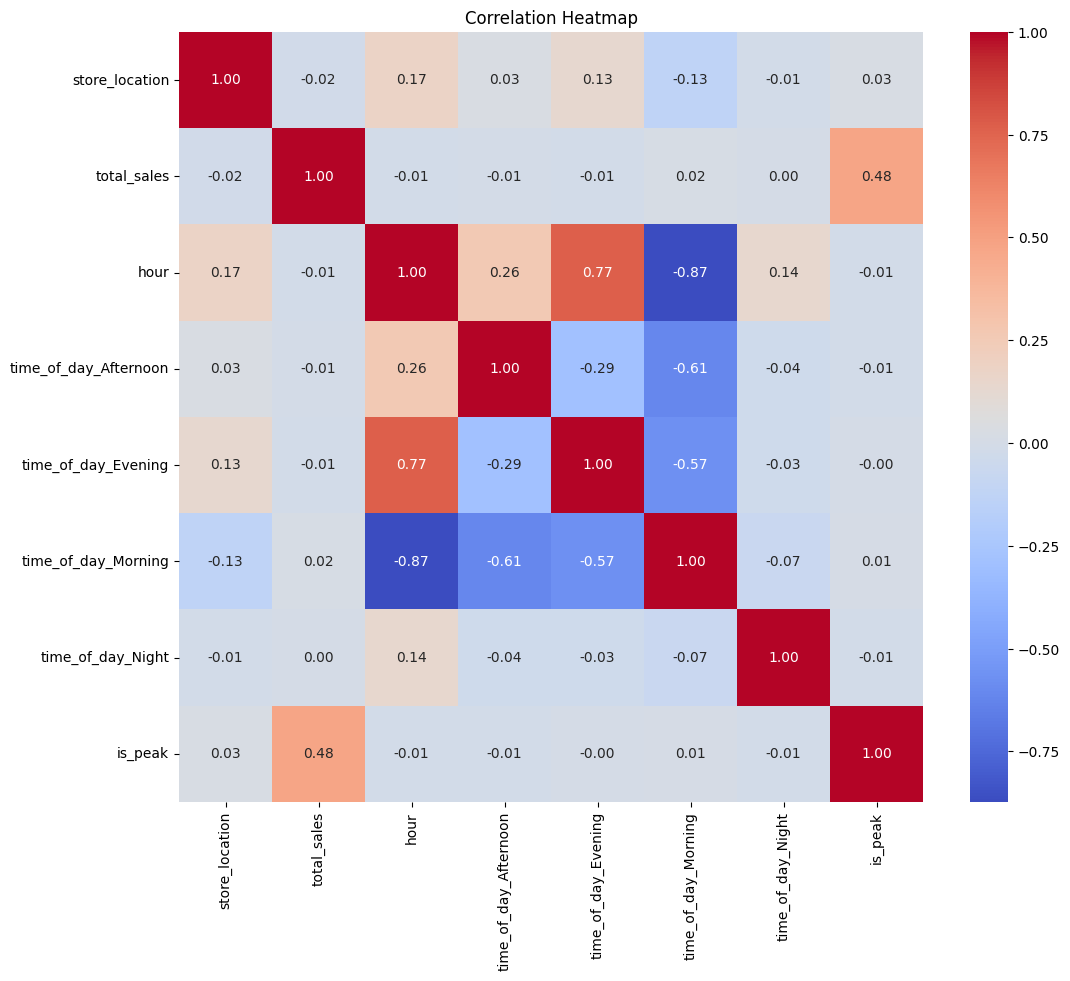

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "Coffee_Dataset_Final.xlsx"  # Replace with your actual file path
df = pd.read_excel(file_path)

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

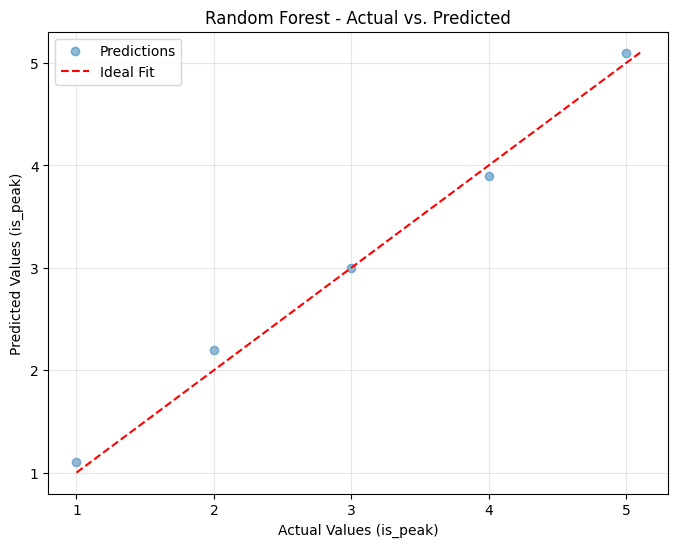

In [ ]:
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for ensuring numeric operations

# Ensure y and y_pred_rf are properly defined
# Replace with your actual data
y = np.array([1, 2, 3, 4, 5])  # Example actual values (replace with your actual data)
y_pred_rf = np.array([1.1, 2.2, 3.0, 3.9, 5.1])  # Example predicted values (replace with your model predictions)

# Check if lengths of y and y_pred_rf match
if len(y) != len(y_pred_rf):
    raise ValueError("Length of 'y' and 'y_pred_rf' must be equal")

# Ensure that y and y_pred_rf are numeric
if not (np.issubdtype(y.dtype, np.number) and np.issubdtype(y_pred_rf.dtype, np.number)):
    raise ValueError("Both 'y' and 'y_pred_rf' must contain numeric data")

# Plot Actual vs. Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_rf, alpha=0.5, label="Predictions")  # Add a label for clarity
plt.xlabel("Actual Values (is_peak)")
plt.ylabel("Predicted Values (is_peak)")
plt.title("Random Forest - Actual vs. Predicted")

# Add a diagonal reference line
min_val = min(min(y), min(y_pred_rf))
max_val = max(max(y), max(y_pred_rf))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label="Ideal Fit")

plt.legend()  # Show legend for clarity
plt.grid(alpha=0.3)  # Add a light grid for better readability
plt.show()

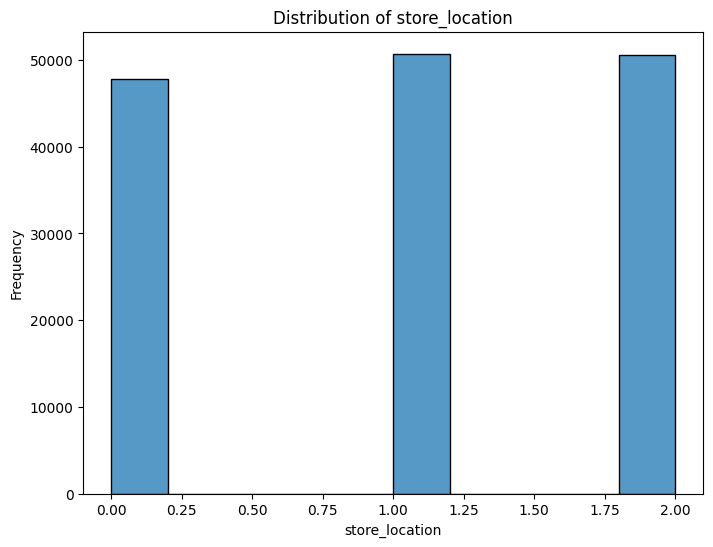

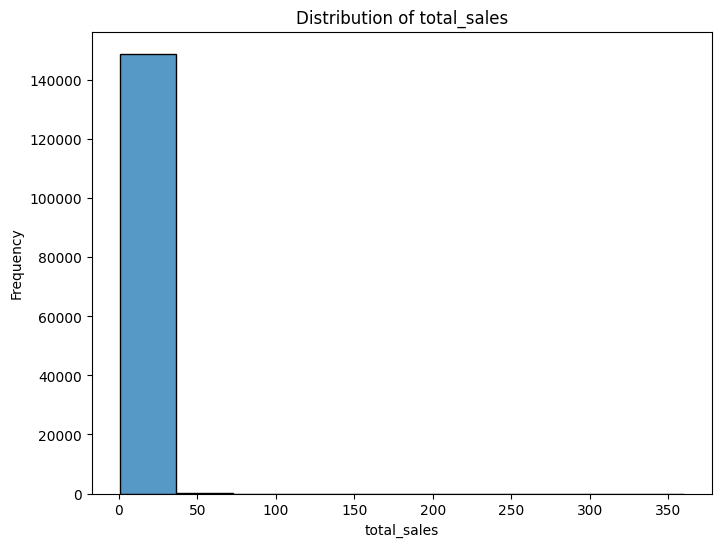

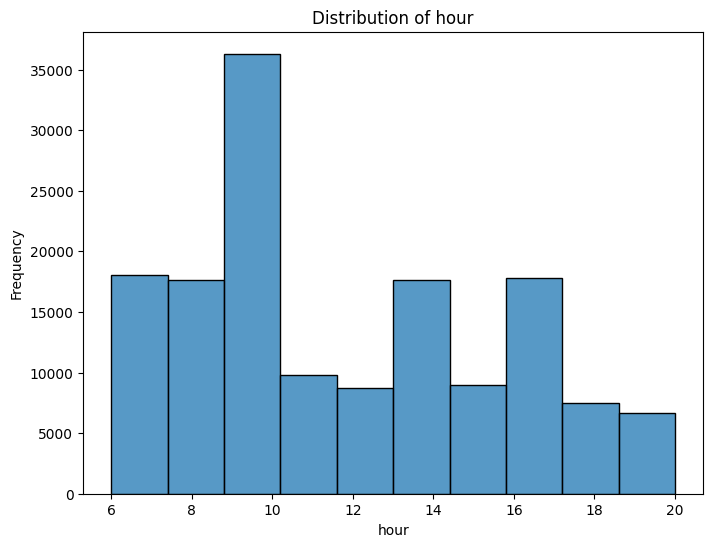

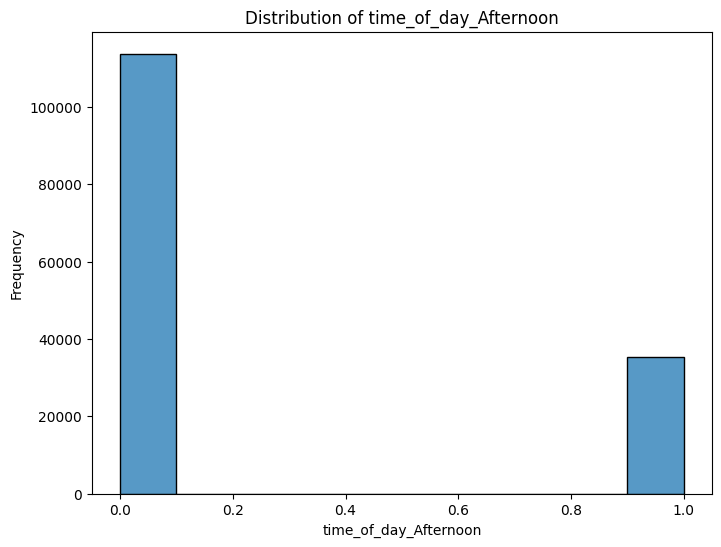

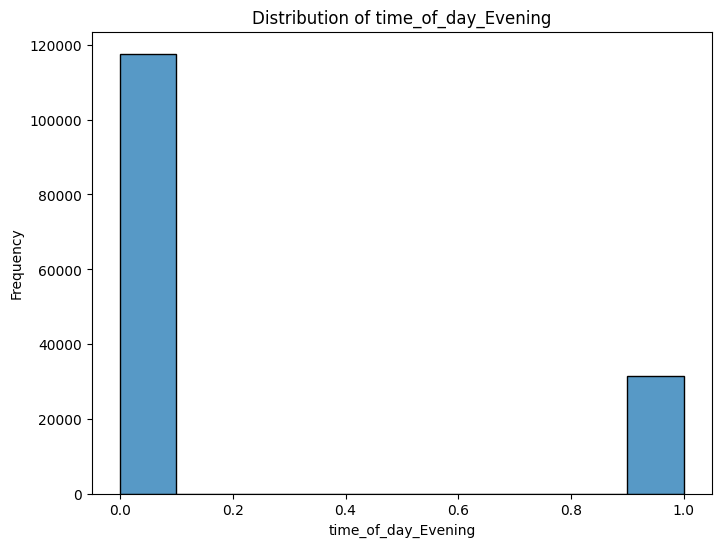

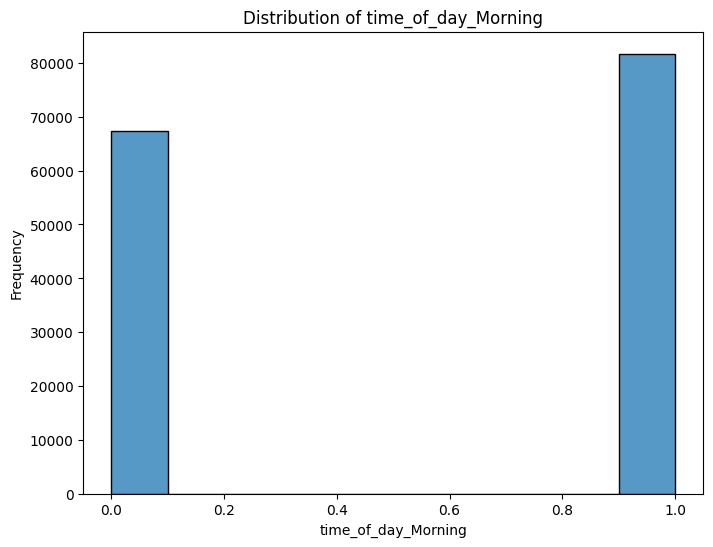

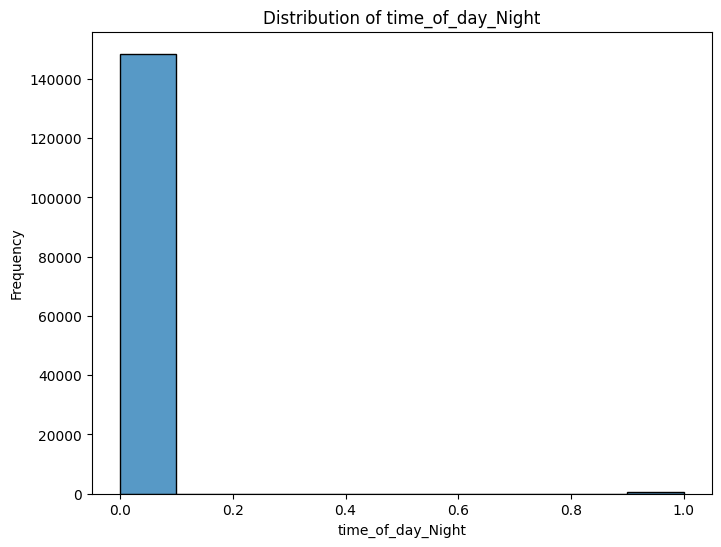

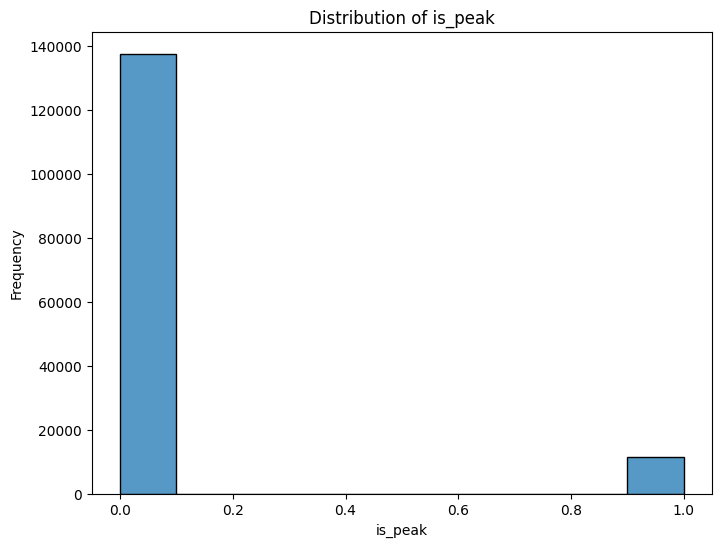

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
file_path = "Coffee_Dataset_Final.xlsx"  # Replace with your actual file path
df = pd.read_excel(file_path)

# Get numeric features
numeric_features = df.select_dtypes(include=['number']).columns

# Create histograms for each numeric feature
for feature in numeric_features:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.histplot(df[feature], bins=10, kde=False)  # Adjust bins and kde as needed
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

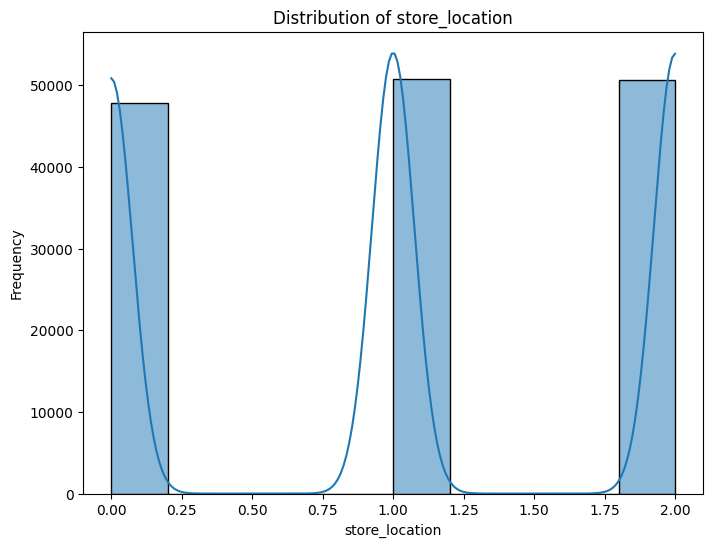

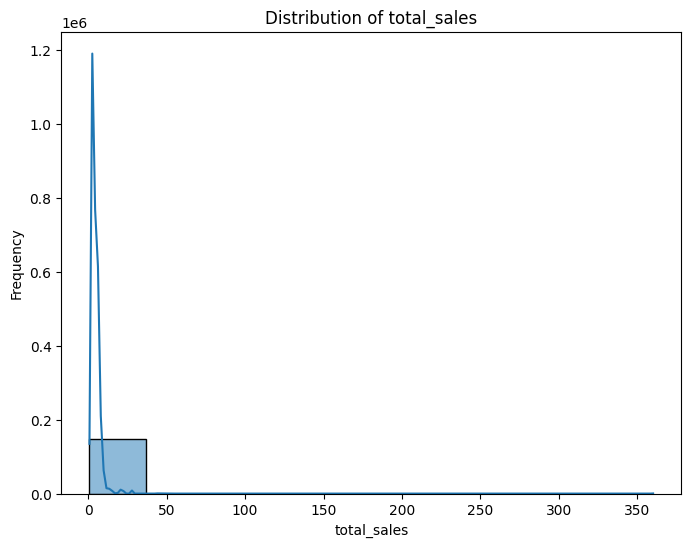

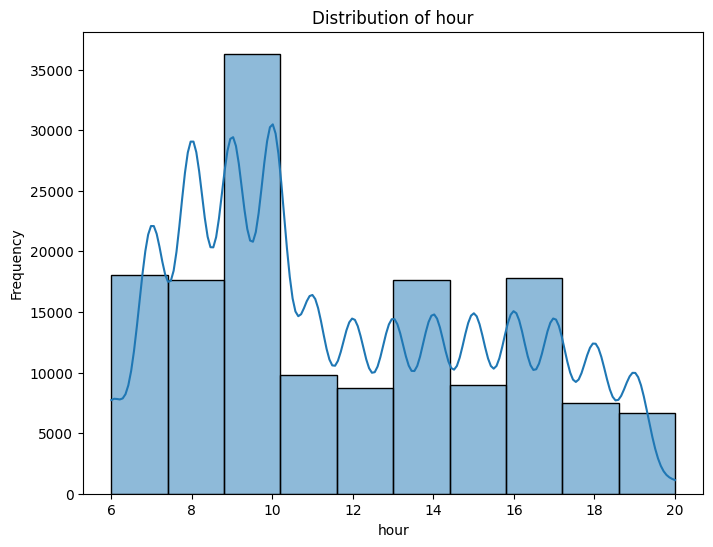

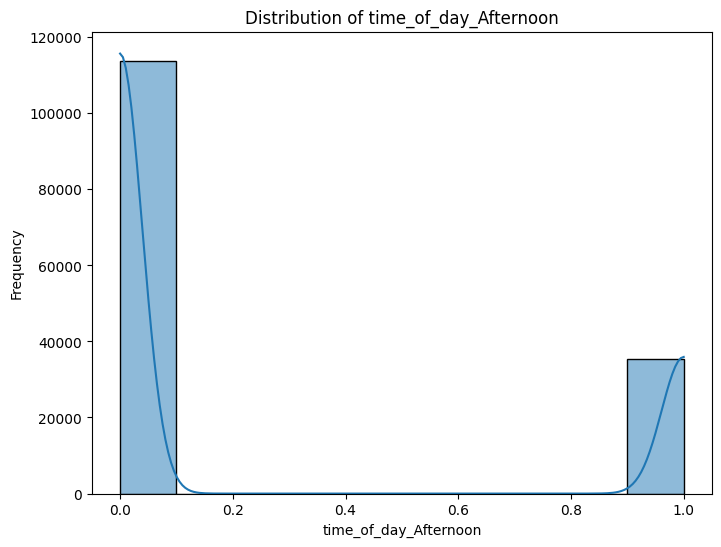

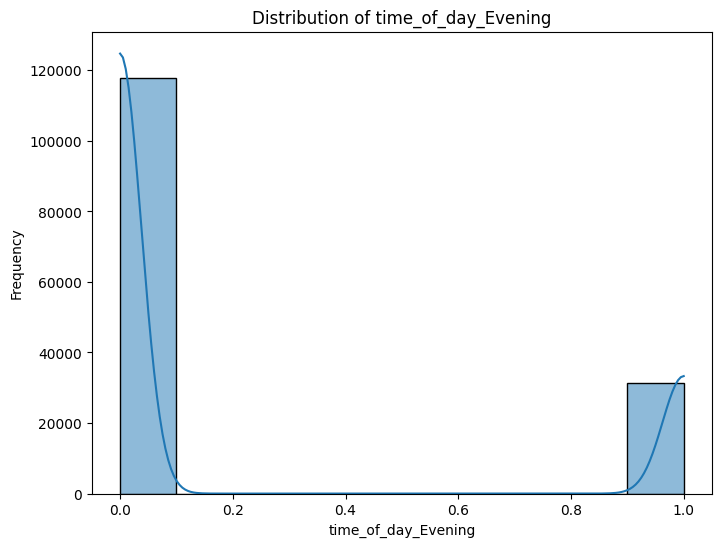

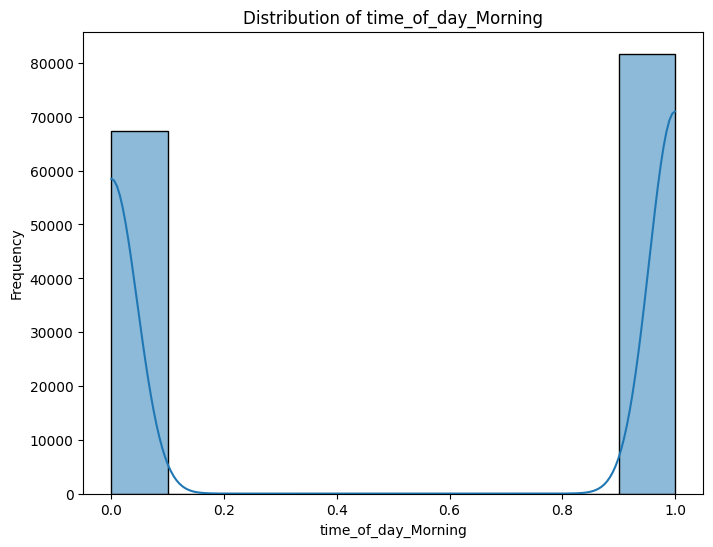

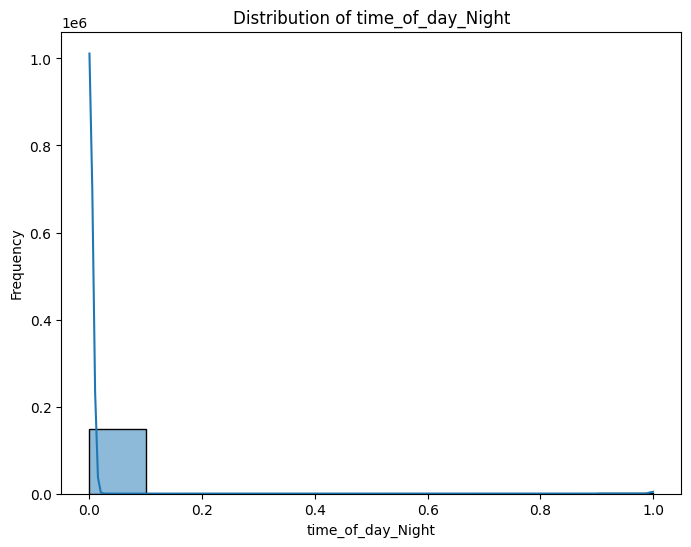

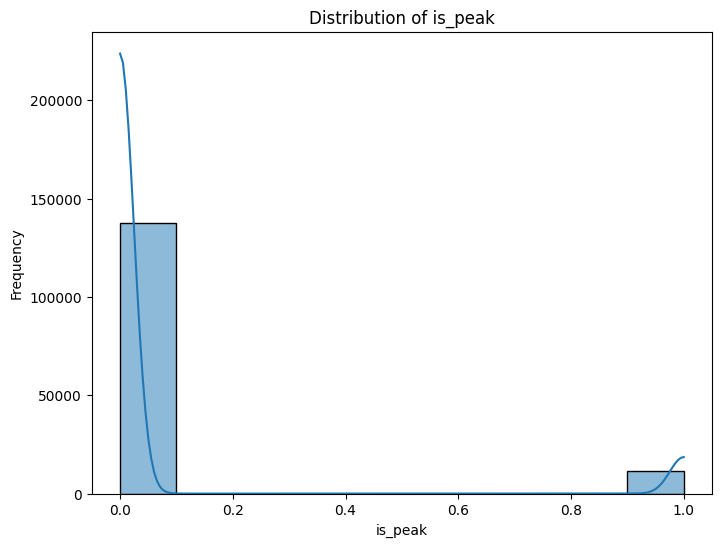

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
file_path = "Coffee_Dataset_Final.xlsx"
df = pd.read_excel(file_path)

# Get numeric features
numeric_features = df.select_dtypes(include=['number']).columns

# Create histograms for each numeric feature
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], bins=10, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Imported Libraries
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


=== Evaluating Decision Tree ===

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       145
           1       0.86      0.86      0.86       155

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



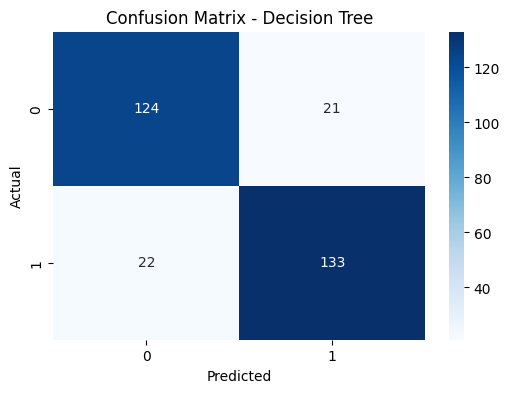

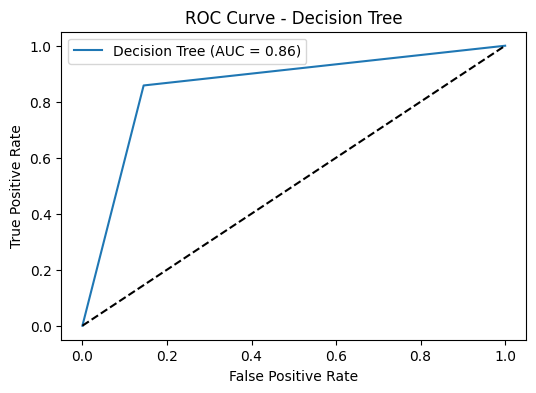


=== Evaluating Random Forest ===

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       145
           1       0.89      0.83      0.86       155

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



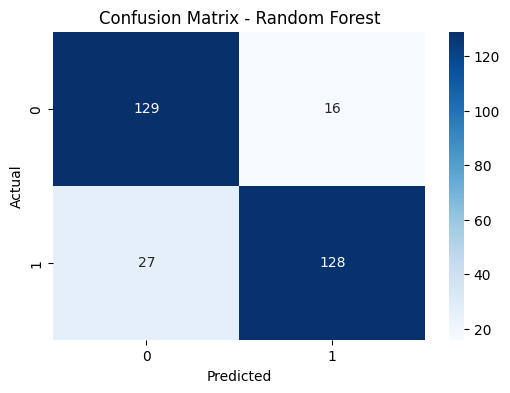

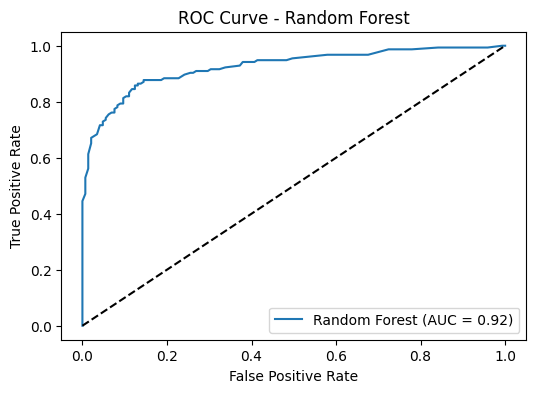


=== Evaluating XGBoost ===

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       145
           1       0.94      0.85      0.89       155

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



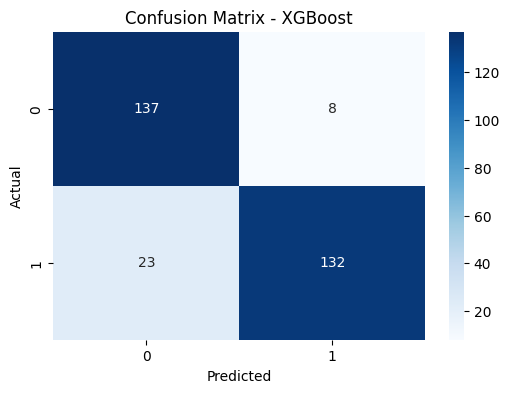

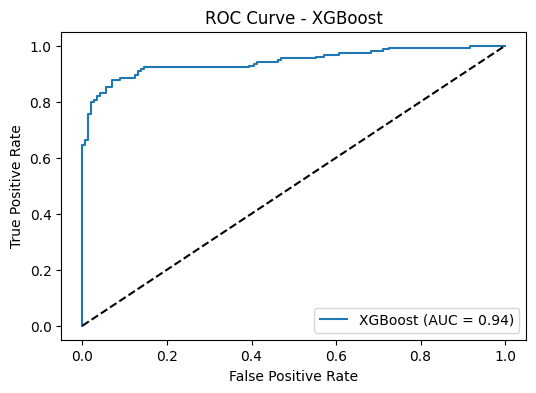


=== Model Comparison ===
           Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC  \
0  Decision Tree  0.856667   0.863636  0.858065  0.860841  0.856618   
1  Random Forest  0.856667   0.888889  0.825806  0.856187  0.924449   
2        XGBoost  0.896667   0.942857  0.851613  0.894915  0.943404   

   Training Time (s)  
0           0.061150  
1           1.121167  
2           3.934873  


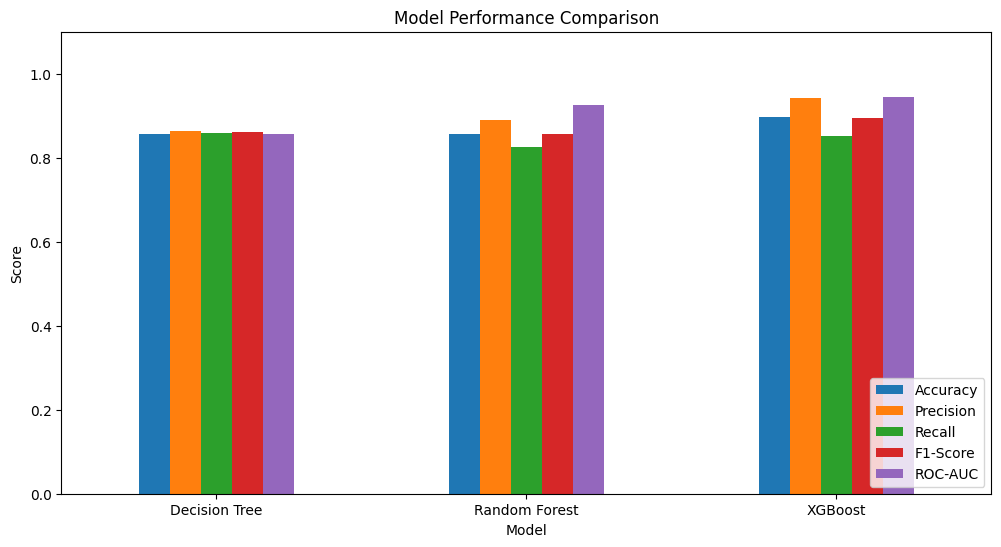

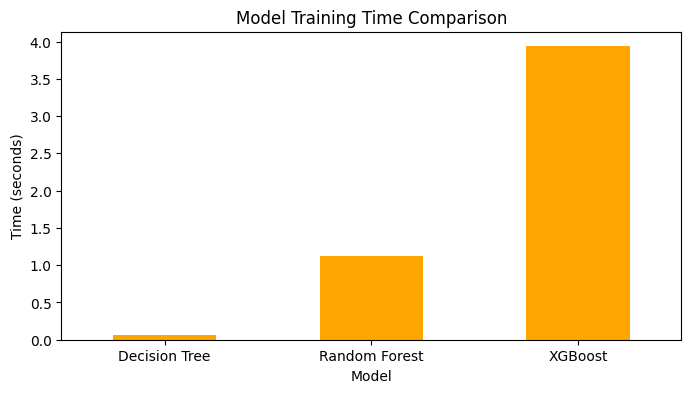

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix,
                            classification_report, roc_curve)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace with your actual data loading)
# df = pd.read_csv('your_data.csv')
# X = df.drop('target', axis=1)
# y = df['target']

# For demonstration, creating synthetic data
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss')
}

# Dictionary to store metrics
metrics_dict = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC-AUC': [],
    'Training Time (s)': []
}

# Evaluate each model
for model_name, model in models.items():
    print(f"\n=== Evaluating {model_name} ===")

    # Train and time the model
    import time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Store metrics
    metrics_dict['Model'].append(model_name)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1-Score'].append(f1)
    metrics_dict['ROC-AUC'].append(roc_auc)
    metrics_dict['Training Time (s)'].append(training_time)

    # Print classification report
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()

# Create comparison dataframe
metrics_df = pd.DataFrame(metrics_dict)

# Display metrics comparison
print("\n=== Model Comparison ===")
print(metrics_df)

# Plot comparison of metrics
metrics_df.set_index('Model').drop('Training Time (s)', axis=1).plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1.1)
plt.legend(loc='lower right')
plt.show()

# Plot training time comparison
metrics_df.set_index('Model')['Training Time (s)'].plot(kind='bar', figsize=(8, 4), color='orange')
plt.title('Model Training Time Comparison')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=0)
plt.show()